# THỰC HÀNH: PHÂN TÍCH THÀNH PHẦN CHÍNH

Cho bộ dữ liệu _Sleep in Mammals_ về một số nhân tố liên quan đến giấc ngủ của 62
loài động vật có vú. Biến:
- **BodyWt** - trọng lượng cơ thể (_kg_)
- **BrainWt** - trọng lượng não (_g_)
- **NonDreaming** - số giờ ngủ không mơ (_giờ/ngày_)
- **Dreaming** - số giờ ngủ có mơ (_giờ/ngày_)
- **TotalSleep** - tổng số giờ ngủ (_giờ/ngày_)
- **LifeSpan** - tuổi thọ (_năm_)
- **Gestation** - thời gian mang thai (_ngày_)
- **Predation** - chỉ số bị săn mồi (_1-5_): 1 = ít khả năng bị săn mồi nhất; 5 = rất có thể là
con mồi
- **Exposure** - chỉ số tiếp xúc khi ngủ (_1-5_): 1 = ít tiếp xúc nhất (ngủ trong hang được bảo
vệ tốt); 5 = tiếp xúc nhiều nhất
- **Danger** - chỉ số gặp nguy hiểm (_1-5_): 1 = ít gặp nguy hiểm nhất; 5 = dễ gặp nguy hiểm
nhất

In [1]:
data = read.csv('Sleep in Mammals.csv')
head(data)

,Species,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,Africanelephant,6654.000,5712.0,2.2,1.6,3.3,38.6,645,3,5,3
2,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42,3,1,3
3,ArcticFox,3.385,44.5,9.5,4.3,12.5,14.0,60,1,1,1
4,Arcticgroundsquirrel,0.920,5.7,9.4,1.5,16.5,7.0,25,5,2,3
5,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624,3,5,4
6,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180,4,4,4


In [2]:
data_numeric = data[, -c(1, 4:6)]

### Thực hiện phân tích hồi quy tuyến tính _tổng số giờ ngủ_ theo _trọng lượng cơ thể_, _trọng lượng não_, _tuổi thọ_, _thời gian mang thai_, _chỉ số săn mồi_, _chỉ số tiếp xúc khi ngủ_ và _chỉ số nguy hiểm_.

### 1) Có nên thực hiện phân tích hồi quy nói trên trực tiếp không? Vì sao?

In [3]:
cor(data_numeric)

,BodyWt,BrainWt,LifeSpan,Gestation,Predation,Exposure,Danger
BodyWt,1.00000000,0.93416384,0.30709665,0.5853735,0.05949472,0.3382737,0.13358123
BrainWt,0.93416384,1.00000000,0.51349541,0.6708432,0.03385548,0.3678004,0.14587888
LifeSpan,0.30709665,0.51349541,1.00000000,0.6216972,-0.10700759,0.3762348,0.06876557
Gestation,0.58537352,0.67084318,0.62169720,1.0000000,0.13218594,0.5836509,0.30158361
Predation,0.05949472,0.03385548,-0.10700759,0.1321859,1.00000000,0.6182460,0.91604245
Exposure,0.33827367,0.36780037,0.37623476,0.5836509,0.61824597,1.0000000,0.78720311
Danger,0.13358123,0.14587888,0.06876557,0.3015836,0.91604245,0.7872031,1.00000000


Không, do các biến như _BodyWt_ và _BrainWt_, _Predation_ và _Danger_ có mức độ tương quan rất cao.

### 2) Vẽ ma trận biểu đồ tán xạ giữa các biến trọng lượng cơ thể, trọng lượng não, tuổi thọ, thời gian mang thai, chỉ số săn mồi, chỉ số tiếp xúc khi ngủ và chỉ số nguy hiểm. 

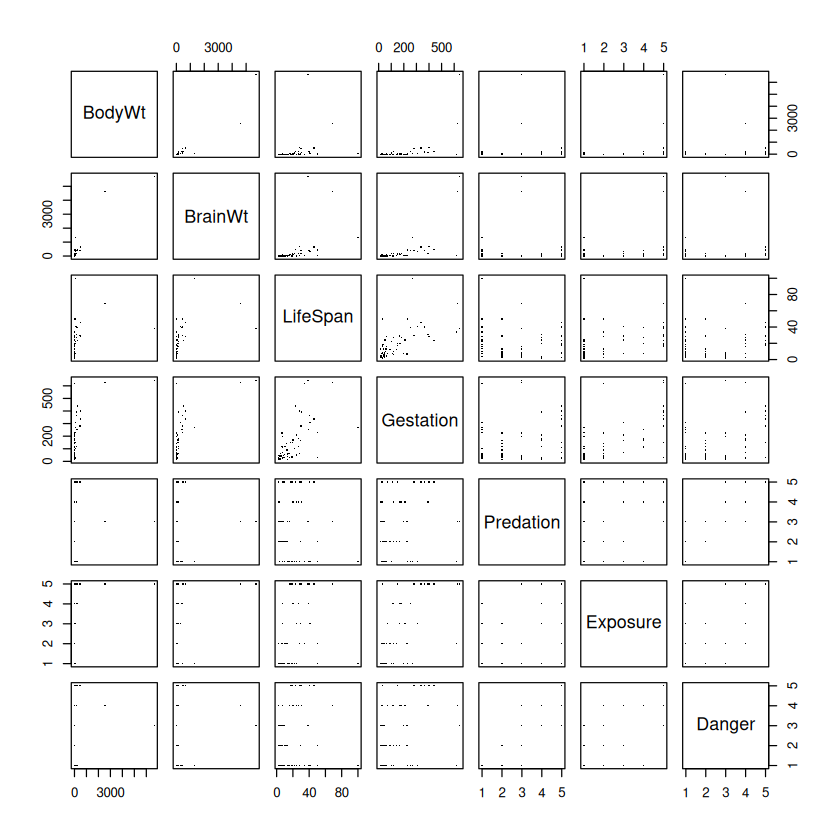

In [4]:
pairs(data_numeric, pch = ".", cex = 1.5)

### 3) Thực hiện phân tích thành phần chính đối với ma trận tương quan giữa các biến trong ý 2).

In [5]:
pca = princomp(data_numeric, cor = TRUE)
summary(pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.8651616 1.4444424 0.9182644 0.54718939 0.45417181
Proportion of Variance 0.4969754 0.2980591 0.1204585 0.04277375 0.02946743
Cumulative Proportion  0.4969754 0.7950345 0.9154930 0.95826676 0.98773419
                          Comp.6      Comp.7
Standard deviation     0.2295744 0.182088562
Proportion of Variance 0.0075292 0.004736606
Cumulative Proportion  0.9952634 1.000000000

### 4) Đưa ra tỉ lệ biến sai tổng cộng của từng thành phần chính.

Tỉ lệ biến sai tổng cộng lần lượt là 0.4969754, 0.2980591, 0.1204585, 0.04277375, 0.02946743, 0.0075292, 0.004736606.

### 5) Biểu diễn thành phần chính thứ nhất và thứ hai theo các biến ban đầu.

In [6]:
summary(pca, loadings = TRUE)

Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     1.8651616 1.4444424 0.9182644 0.54718939 0.45417181
Proportion of Variance 0.4969754 0.2980591 0.1204585 0.04277375 0.02946743
Cumulative Proportion  0.4969754 0.7950345 0.9154930 0.95826676 0.98773419
                          Comp.6      Comp.7
Standard deviation     0.2295744 0.182088562
Proportion of Variance 0.0075292 0.004736606
Cumulative Proportion  0.9952634 1.000000000

Loadings:
          Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7
BodyWt     0.386  0.311  0.554         0.133  0.258  0.598
BrainWt    0.419  0.350  0.336  0.255        -0.313 -0.652
LifeSpan   0.311  0.295 -0.678  0.554         0.113  0.175
Gestation  0.442  0.196 -0.232 -0.708 -0.458              
Predation  0.263 -0.564  0.163  0.240 -0.431  0.550 -0.198
Exposure   0.441 -0.271 -0.200 -0.222  0.756  0.195 -0.183
Danger     0.345 -0.514         0.119        -0.694  0.337

PC1 = BodyWt x 0.386 + BrainWt x 0.419 + LifeSpan x 0.311 + Gestation x 0.442 + Predation x 0.263 + Exposure x 0.441 + Danger x 0.345

PC2 = BodyWt x 0.311 + BrainWt x 0.350 + LifeSpan x 0.295 + Gestation x 0.196 - Predation x 0.564 - Exposure x 0.271 - Danger x 0.514

### 6) Cần _m_ thành phần chính để thu được 90% thông tin về tập dữ liệu ban đầu. Tìm _m_.

Do, 0.4969754 + 0.2980591 + 0.1204585 = 0.915493 > 0.9 $\Rightarrow$ m = 3

### 7) Vẽ các biểu đồ tán xạ giữa biến _tổng số giờ ngủ_ theo _m_ thành phần chính vừa tìm được ở ý 6).

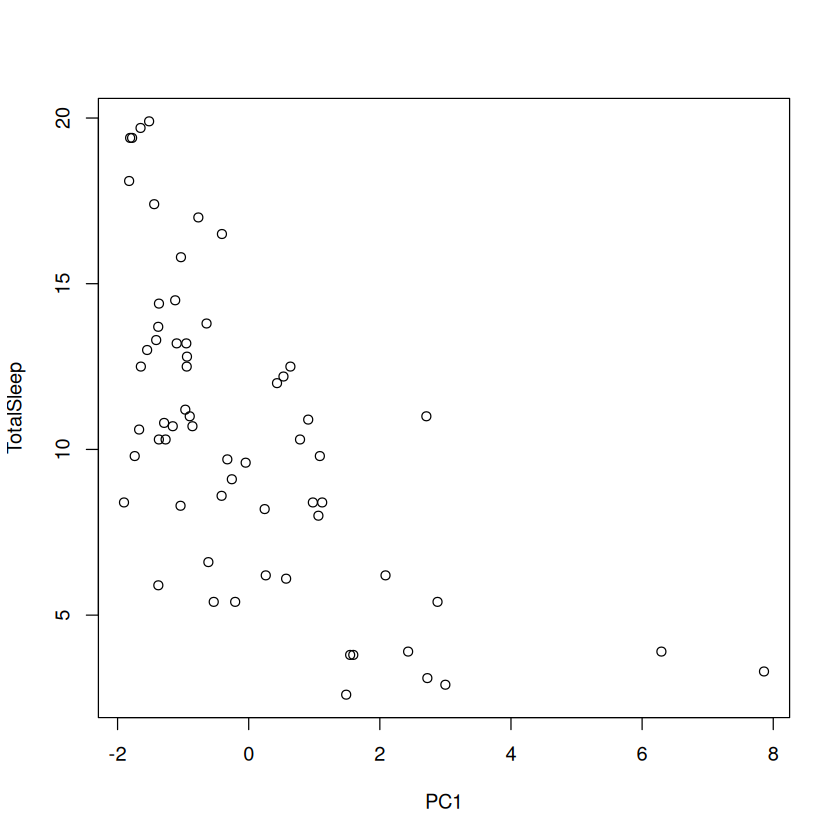

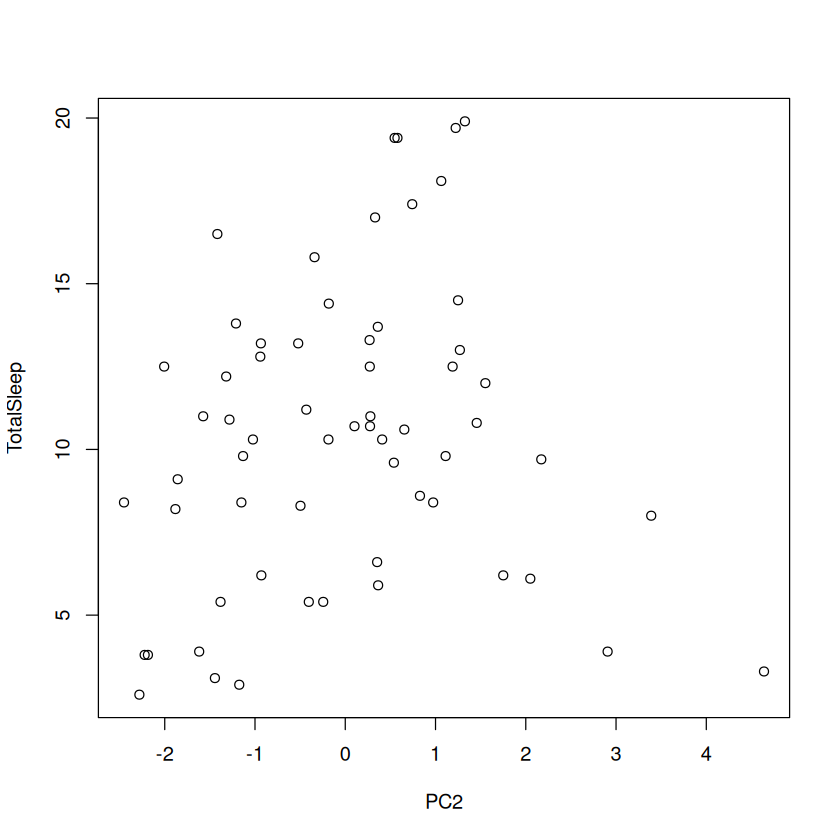

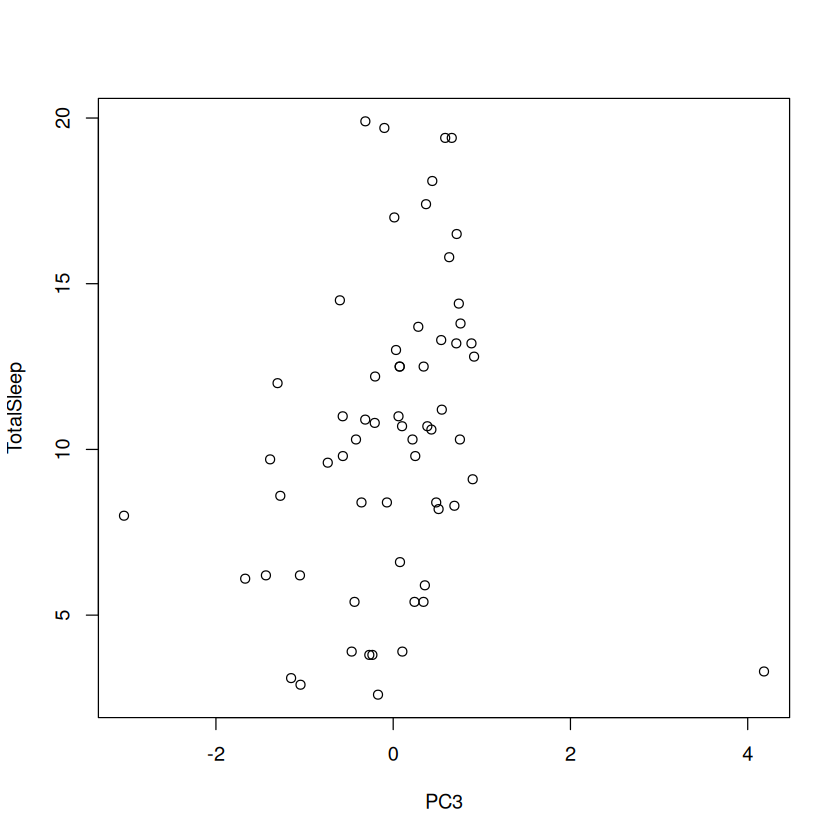

In [7]:
out <- sapply(1:3, function(i) {
    plot(pca$scores[, i], data$TotalSleep, xlab = paste("PC", i, sep = ""),
         ylab = "TotalSleep")
})

### 8) Đưa ra phương trình hồi quy tuyến tính của _tổng số giờ ngủ_ theo _m_ thành phần chính vừa tìm được ở ý 6).

In [8]:
model = lm(TotalSleep ~ pca$scores[, 1:3], data = data)
summary(model)


Call:
lm(formula = TotalSleep ~ pca$scores[, 1:3], data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1517 -2.0387 -0.1761  2.1974  6.8197 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              10.4097     0.4299  24.216  < 2e-16 ***
pca$scores[, 1:3]Comp.1  -1.5601     0.2305  -6.769 7.15e-09 ***
pca$scores[, 1:3]Comp.2   0.4455     0.2976   1.497   0.1398    
pca$scores[, 1:3]Comp.3   0.9220     0.4681   1.970   0.0537 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.385 on 58 degrees of freedom
Multiple R-squared:  0.4724,	Adjusted R-squared:  0.4452 
F-statistic: 17.31 on 3 and 58 DF,  p-value: 3.803e-08


### 9) Mô hình đó có tốt không?

Do p-value = 3.803e-08, mô hình có ý nghĩa thống kê.